## Currently easy trials are not removed for any plot, however all results are the same if you do remove easy trials

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from cycler import cycler
import popoff
import pop_off_functions as pof
import pop_off_plotting as pop
from Session import SessionLite
from linear_model import PoolAcrossSessions, LinearModel, MultiSessionModel
from utils.utils_funcs import d_prime
from tqdm import tqdm
import svgutils.compose as sc
import IPython.display as ip

/home/tplas/repos/popping-off/popoff/popoff/loadpaths.py
/home/tplas/repos/Vape


In [3]:
pas = PoolAcrossSessions(remove_targets=False, subsample_sessions=False,
                         remove_toosoon=True)

for ss in pas.sessions.values():
    _ = pop.normalise_raster_data(session=ss, sort_neurons=False, filter_150_stim=False)
    

long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time


In [4]:
# pas.sessions
print(pas.plot_string(is_plot=False))

Hello Adam
Remove targets is False.
Remove too soon is True
Here are the sessions in play:
['Mouse J064, run 10', 'Mouse J064, run 11', 'Mouse J064, run 14', 'Mouse RL070, run 28', 'Mouse RL070, run 29', 'Mouse RL117, run 29', 'Mouse RL117, run 30', 'Mouse RL123, run 22', 'Mouse RL116, run 32', 'Mouse RL116, run 33']
pre-frames spans -0.5 to -0.1 inclusive
post-frames spans 0.83 to 6.0 inclusive


(-0.5, 2.5)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


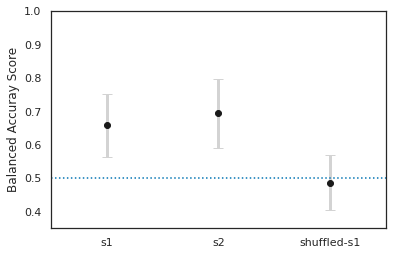

In [5]:
coefs = pas.compare_regions_all_sessions(frames = 'pre', make_plot=True)
plt.ylabel('Balanced Accuray Score')
plt.ylim(0.35, 1)
plt.xlim(-0.5, 2.5)

# save_figure('Figure4_pre-stim-allCellsDecoder_S1S2null')

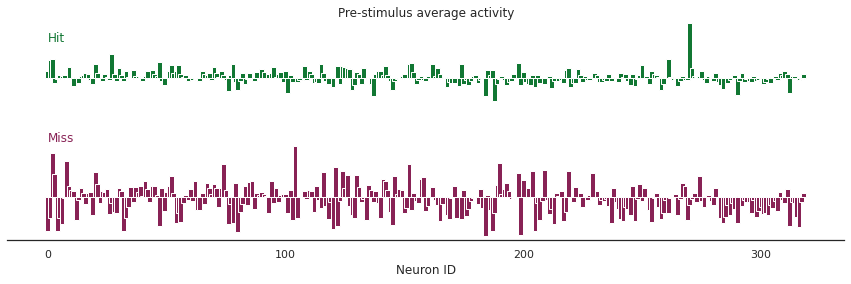

In [6]:
lm = pas.linear_models[0]
pop.firing_rate_dist(lm, region='s1', match_tnums=False, sort=False)
# save_figure('Figure4_firingRateDist')

In [22]:
reg_list = ['s1', 's2']
cov_dicts = {x: {} for x in reg_list}
super_covar_df_dict = {}
for i_reg, reg in enumerate(reg_list):
    print(reg)
    for i_lm, linear_model in tqdm(enumerate(pas.linear_models)):
        cov_dicts[reg][i_lm] = pof.get_covariates(linear_model, reg, hitmiss_only=True)

    super_covar_df_dict[reg] = pof.create_df_from_cov_dicts(cov_dicts=cov_dicts[reg], 
                                                  zscore_list=['variance_cell_rates'])

0it [00:00, ?it/s]

s1


10it [01:33,  9.33s/it]
0it [00:00, ?it/s]

s2


10it [01:17,  7.76s/it]


Session 0, LinregressResult(slope=-0.134329686737248, intercept=0.8161898321983342, rvalue=-0.9463676133961008, pvalue=9.325160752266997e-18, stderr=0.00798327627319934, intercept_stderr=0.002954420215858118)
Session 1, LinregressResult(slope=-0.15744472917199834, intercept=0.683877048351051, rvalue=-0.9283292914176333, pvalue=9.809648373534891e-26, stderr=0.008425457786794646, intercept_stderr=0.00378809112429333)
Session 2, LinregressResult(slope=-0.215433858544543, intercept=0.7262015827479701, rvalue=-0.9526947179005392, pvalue=1.0950713424704104e-31, stderr=0.009024397155298776, intercept_stderr=0.004723485078813737)
Session 3, LinregressResult(slope=-0.10207154460700106, intercept=0.2843478997427719, rvalue=-0.9051578846701899, pvalue=8.03521338432943e-63, stderr=0.0037430404986740352, intercept_stderr=0.0026049013957556515)
Session 4, LinregressResult(slope=-0.24637549926054314, intercept=0.6132484299043421, rvalue=-0.9701284827754688, pvalue=4.9891847032050395e-67, stderr=0.005

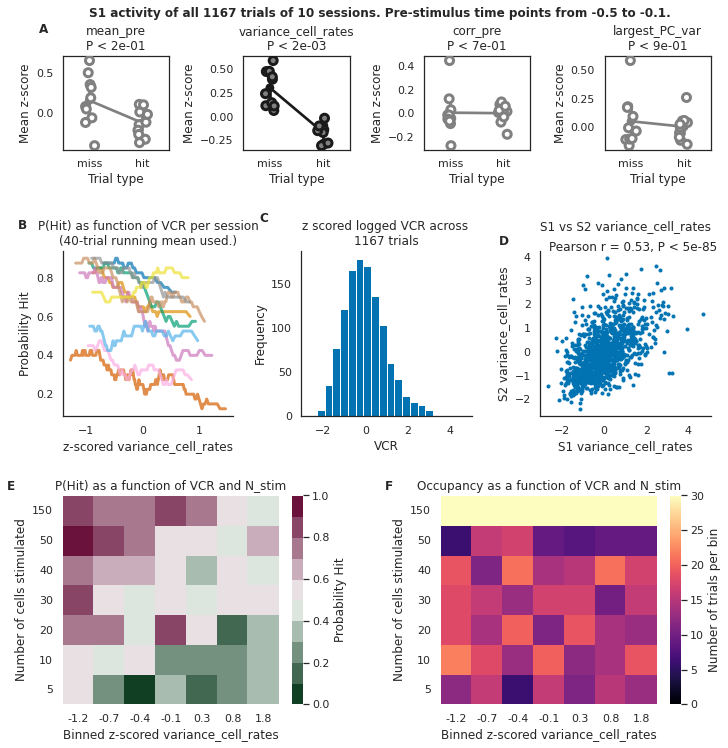

In [6]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(10, 10))
gs_top = fig.add_gridspec(ncols=4, nrows=1, bottom=0.82, top=0.95, right=0.95, left=0.05, 
                          hspace=0.3, wspace=0.7)
gs_middle = fig.add_gridspec(ncols=3, nrows=1, bottom=0.45, top=0.68, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.4)
gs_bottom = fig.add_gridspec(ncols=2, nrows=1, bottom=0.05, top=0.34, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.4)

cov_names = ['mean_pre', 'variance_cell_rates', 'corr_pre', 'largest_PC_var']
n_bins = 7
region = 's1'

ax_cov_scatter = {x: fig.add_subplot(gs_top[i_x]) for i_x, x in enumerate(cov_names)}
ax_vcr_lines = fig.add_subplot(gs_middle[0])
ax_vcr_hist = fig.add_subplot(gs_middle[1])
ax_vcr_s1s2 = fig.add_subplot(gs_middle[2])
ax_matrices = {i_x: fig.add_subplot(gs_bottom[i_x]) for i_x in range(2)}

pop.scatter_plots_covariates(cov_dicts=cov_dicts[region], cov_names=cov_names, 
                             ax_dict=ax_cov_scatter, lims=None, plot_type='pointplot')

pop.plot_accuracy_covar(cov_dicts=cov_dicts[region], zscore_covar=True,
                        one_sided_ws=20, ax=ax_vcr_lines, sessions=pas.sessions)

pop.hist_covar(ax=ax_vcr_hist, super_covar_df=super_covar_df_dict[region])

pop.scatter_covar_s1s2(super_covar_df_dict=super_covar_df_dict, ax=ax_vcr_s1s2)

pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_matrices[0])
pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='occupancy', ax=ax_matrices[1])

assert len(pas.linear_models[0].session.filter_ps_time) == len(pas.linear_models[0].pre)
time_pre = pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre]
str_time = f'Pre-stimulus time points from {np.round(time_pre[0], 2)} to {np.round(time_pre[-1], 2)}'
signature_time = f'{np.round(time_pre[0], 2)}_to_{np.round(time_pre[-1], 2)}'.replace('.', ',')
ax_cov_scatter[cov_names[0]].text(s=f'{region.upper()} activity of all {len(super_covar_df_dict[region])} trials of {len(pas.linear_models)} sessions. {str_time}.',
                                  x=0, y=1.2, fontdict={'weight': 'bold'});

ax_cov_scatter[cov_names[0]].text(s='A', x=-0.95, y=1, fontdict={'weight': 'bold'})
ax_vcr_lines.text(s='B', x=-2.2, y=1.05, fontdict={'weight': 'bold'})
ax_vcr_hist.text(s='C', x=-5, y=220, fontdict={'weight': 'bold'})
ax_vcr_s1s2.text(s='D', x=-5, y=4.5, fontdict={'weight': 'bold'})
ax_matrices[0].text(s='E', x=-1.8, y=7.2, fontdict={'weight': 'bold'})
ax_matrices[1].text(s='F', x=-1.8, y=7.2, fontdict={'weight': 'bold'})

if save_fig:
    plt.savefig(f'/home/tplas/repos/popping-off/figures/snr_overview/snr_overview_{region}_prestim{signature_time}_{len(super_covar_df_dict[region])}sessions.pdf',
                bbox_inches='tight')

WilcoxonResult(statistic=0.0, pvalue=0.001953125)


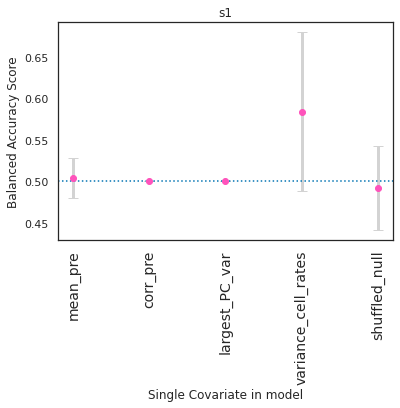

In [86]:
pas.single_covariate(region=region)
# save_figure(f'Figure4_singleCovarite_{region}')

In [41]:
cov_dicts['s1'][0].keys()

dict_keys(['trial_mean', 'delta_f', 'mean_pre', 'mean_post', 'corr_pre', 'corr_post', 'largest_singular_value', 'largest_PC_var', 'n_PCs_90', 'n_PCs_95', 'largest_factor_var', 'flat', 'trial_number', 'flattened_variance', 'variance_pop_mean', 'variance_cell_rates', 'mean_cell_variance', 'reward_history', 'n_cells_stimmed', 'lick', 'reward', 'jonas_metric', 'y'])

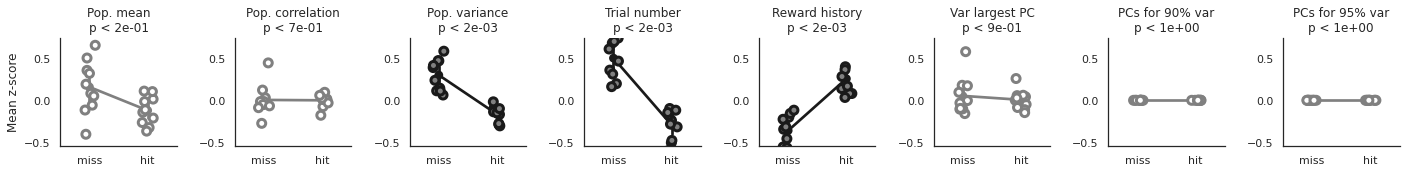

In [45]:
pop.scatter_plots_covariates(cov_dicts=cov_dicts['s1'], #cov_names=cov_names, 
#                              ax_dict=ax_cov_scatter, 
                             cov_names= ['mean_pre', 'corr_pre', 'variance_cell_rates',
                                         'trial_number', 'reward_history',
                                         'largest_PC_var',
                                         'n_PCs_90', 'n_PCs_95'],
                             lims=None, plot_type='pointplot')


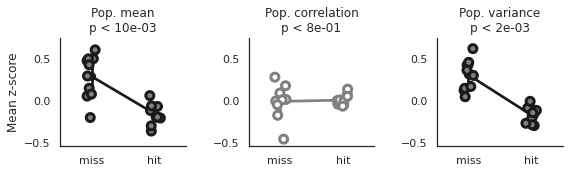

In [46]:
pop.scatter_plots_covariates(cov_dicts=cov_dicts['s2'], #cov_names=cov_names, 
#                              ax_dict=ax_cov_scatter, 
                             cov_names= ['mean_pre', 'corr_pre', 'variance_cell_rates'],
#                                          'largest_PC_var',
#                                          'n_PCs_90', 'n_PCs_95'],
                             lims=None, plot_type='pointplot')


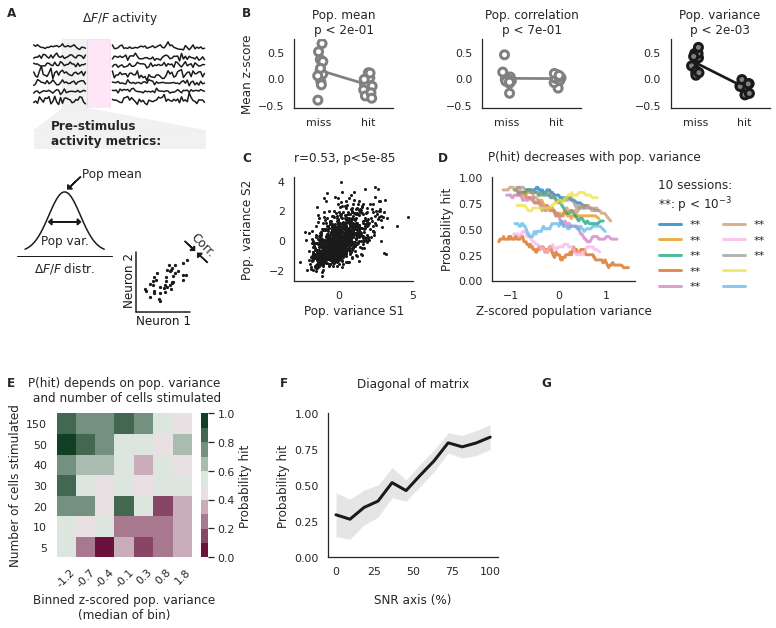

In [49]:
save_fig = False
plot_pc_var = False

fig = plt.figure(constrained_layout=False, figsize=(11, 8))
gs_sketch_prestim = fig.add_gridspec(ncols=1, nrows=1, bottom=0.83, top=0.95, right=0.25, left=0.01, 
                          hspace=0.3, wspace=0.7)
gs_sketch_metrics = fig.add_gridspec(ncols=1, nrows=1, bottom=0.45, top=0.71, right=0.25, left=0.05, 
                          hspace=0.05, wspace=0.7)

gs_scatter = fig.add_gridspec(ncols=(4 if plot_pc_var else 3), nrows=1, bottom=0.83, top=0.95, right=0.95, left=0.35, 
                          hspace=0.3, wspace=0.9)
gs_scatter_s1s2 = fig.add_gridspec(ncols=1, nrows=1, bottom=0.53, top=0.71, right=0.5, left=0.35, 
                          hspace=0.3, wspace=0.7)
gs_acc_lines = fig.add_gridspec(ncols=1, nrows=1, bottom=0.53, top=0.71, right=0.78, left=0.6, 
                             hspace=0.8, wspace=0.4)
gs_bottom = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.3, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.6)

if plot_pc_var:
    cov_names = ['mean_pre', 'corr_pre', 'variance_cell_rates', 'largest_PC_var']
else:
    cov_names = ['mean_pre', 'corr_pre', 'variance_cell_rates']
n_bins = 7
region = 's1'

ax_sketch = fig.add_subplot(gs_sketch_prestim[0])
ax_hit_vcr = fig.add_subplot(gs_sketch_metrics[0])
# ax_miss_vcr = fig.add_subplot(gs_sketch_metrics[1])
ax_cov_scatter = {x: fig.add_subplot(gs_scatter[i_x]) for i_x, x in enumerate(cov_names)}

ax_vcr_s1s2 = fig.add_subplot(gs_scatter_s1s2[0])
ax_vcr_lines = fig.add_subplot(gs_acc_lines[0])
ax_collapsed_matrix = fig.add_subplot(gs_bottom[1])
ax_matrix = fig.add_subplot(gs_bottom[0])

pop.pre_stim_sketch(session=pas.linear_models[0].session, ax=ax_sketch)
# pop.firing_rate_dist(lm=pas.linear_models[0], region='s1', match_tnums=False, sort=False,
#                       ax_hit=ax_hit_vcr, ax_miss=ax_miss_vcr)
pop.covar_sketch(ax=ax_hit_vcr, plot_pc_var=plot_pc_var)
pop.scatter_plots_covariates(cov_dicts=cov_dicts[region], cov_names=cov_names, 
                             bonf_n_tests=8,   # use 8 because of supp fig 
                             ax_dict=ax_cov_scatter, lims=None, plot_type='pointplot')

pop.plot_accuracy_covar(cov_dicts=cov_dicts[region], zscore_covar=True, verbose=0,
                        one_sided_ws=20, ax=ax_vcr_lines, sessions=pas.sessions)
ax_vcr_lines.set_title('                P(hit) decreases with pop. variance', y=1.1)
pop.scatter_covar_s1s2(super_covar_df_dict=super_covar_df_dict, ax=ax_vcr_s1s2)

pop.plot_collapsed_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_collapsed_matrix, pool_trials=True)

pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_matrix,  plot_arrow=False)

assert len(pas.linear_models[0].session.filter_ps_time) == len(pas.linear_models[0].pre)
time_pre = pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre]
str_time = f'Pre-stimulus time points from {np.round(time_pre[0], 2)} to {np.round(time_pre[-1], 2)}'
signature_time = f'{np.round(time_pre[0], 2)}_to_{np.round(time_pre[-1], 2)}'.replace('.', ',')

# ax_cov_scatter[cov_names[0]].text(s=f'{region.upper()} activity of all {len(super_covar_df_dict[region])} trials of {len(pas.linear_models)} sessions. {str_time}.',
#                                   x=0, y=1.2, fontdict={'weight': 'bold'});

if plot_pc_var:
    ax_cov_scatter[cov_names[0]].text(s='A', x=-8.6, y=1.17, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='B', x=-1.73, y=1.17, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='C', x=-1.73, y=-1.55, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='D', x=3.6, y=-1.55, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='E', x=-8.6, y=-5.78, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='F', x=-1.05, y=-5.78, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='G', x=6.2, y=-5.78, fontdict={'weight': 'bold'})
else:
    ax_cov_scatter[cov_names[0]].text(s='A', x=-6.3, y=1.17, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='B', x=-1.55, y=1.17, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='C', x=-1.55, y=-1.55, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='D', x=2.4, y=-1.55, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='E', x=-6.3, y=-5.78, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='F', x=-0.8, y=-5.78, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='G', x=4.5, y=-5.78, fontdict={'weight': 'bold'})

fig.align_ylabels(axs=[ax_cov_scatter['mean_pre'], ax_vcr_s1s2])
fig.align_xlabels(axs=[ax_matrix, ax_collapsed_matrix])

if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_wo_schem_no-arrow.svg',
                bbox_inches='tight')

In [45]:
## Combine svgs
sc.Figure('15.6cm', '12.4cm',
          sc.Panel(sc.SVG('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_wo_schem.svg').scale(0.02).move(0, 0)),
          sc.Panel(sc.SVG('/home/tplas/repos/popping-off/figures/schematic_snr_fig_4.svg').scale(0.04).move(10.75, 7.5))
                  ).save('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_complete.svg')

## Show svg
ip.SVG('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_complete.svg')

## inspect variance and stuff

59
16


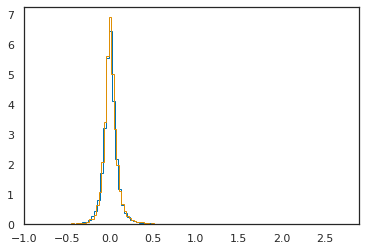

In [141]:
for tt in ['hit', 'miss']:
    tt_ind = np.where(outcome_arr == tt)[0]
    print(len(tt_ind))
    plt.hist(data_use_mat_norm_s1[:, tt_ind, :][:, :, 48:61].mean(2).ravel(), bins=100, density=True,
             histtype='step');

90
58


No handles with labels found to put in legend.


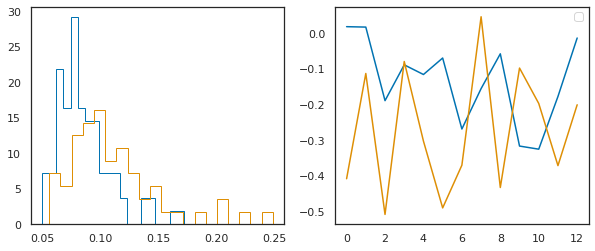

In [306]:
i_session = 4
vcr_arr = {}
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
for tt in ['hit', 'miss']:
    model = pas.linear_models[i_session]
    tt_ind = np.where(model.session.outcome == tt)[0]
    print(len(tt_ind))
    data = model.flu[model.region_map['s1'], :, :][:, tt_ind, :][:, :, pas.linear_models[i_session].pre].mean(2)
    vcr_arr[tt] = np.var(data, 0)
    
    inds_vcr_sort = np.argsort(vcr_arr[tt])
    half_way_point = int(len(inds_vcr_sort) / 2)
    
#     plt.hist(data[:, :].mean(1), bins=20, density=True,
#              histtype='step', label=tt);
#     
#     plt.hist(data[:, inds_vcr_sort[:half_way_point]].ravel(), bins=50, density=True,
#              histtype='step', label=tt + '_low');
#     plt.hist(data[:, inds_vcr_sort[half_way_point:]].ravel(), bins=50, density=True,
#              histtype='step', label=tt + '_high');
    ax[0].hist(vcr_arr[tt], bins=20, density=True, histtype='step', label=tt)
    
    
    ax[1].plot(model.flu[model.region_map['s1'], :, :][4, :, :][tt_ind, :][10, :][model.pre])
#     plt.xlabel('trial av DF/F activity')
# plt.yscale('log')
plt.legend()
# plt.xlim([-1, 1.2])

In [303]:
model.flu[model.region_map['s1'], :, :][3, :, :][tt_ind, :][10, :].shape

(300,)

In [130]:
pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre]

array([-0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
       -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
       -0.16666667, -0.13333333, -0.1       ])

In [121]:
(pas.linear_models[0].session.behaviour_trials == pas.linear_models[0].flu).all()

True

# Supp with scatter plots 

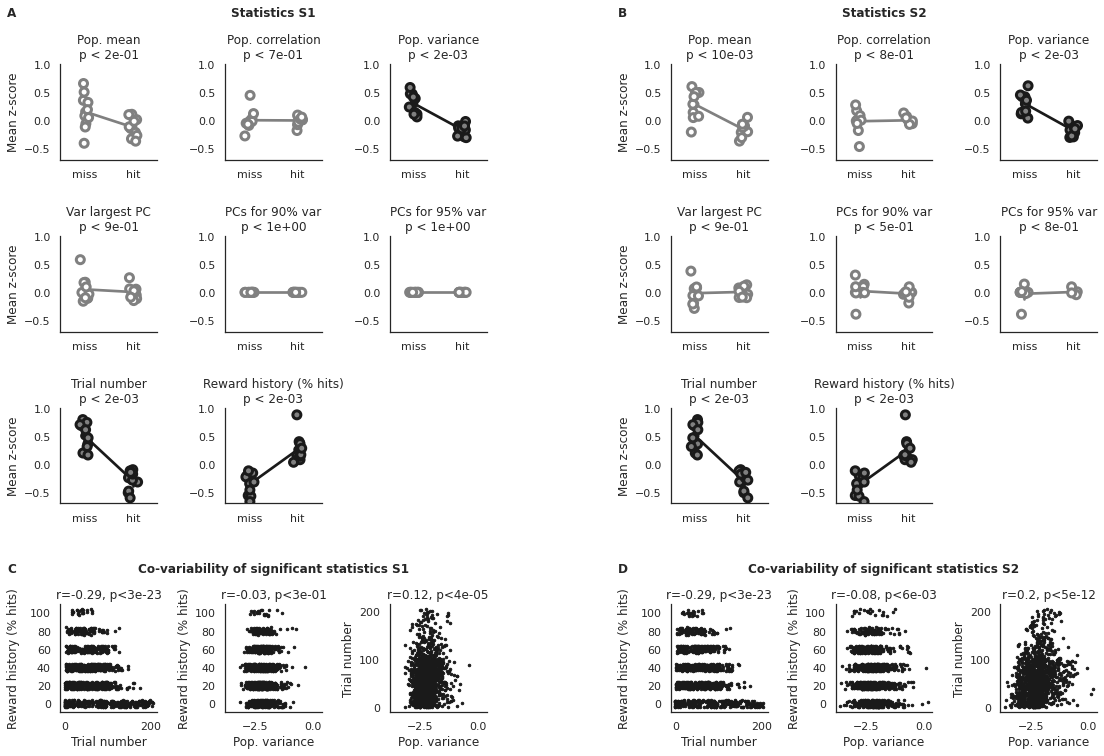

In [555]:
cov_names = ['mean_pre', 'corr_pre', 'variance_cell_rates',
             'largest_PC_var', 'n_PCs_90', 'n_PCs_95',
             'trial_number', 'reward_history']
save_fig = False


fig = plt.figure(constrained_layout=False, figsize=(16, 10))
gs_pointplot = {}
gs_pointplot['s1'] = fig.add_gridspec(ncols=3, nrows=3, bottom=0.34, top=0.95, right=0.42, left=0.05, 
                          hspace=0.8, wspace=0.7)

gs_pointplot['s2'] = fig.add_gridspec(ncols=3, nrows=3, bottom=0.34, top=0.95, right=0.95, left=0.58, 
                          hspace=0.8, wspace=0.7)

gs_scatter = {}
gs_scatter['s1'] = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.2, right=0.42, left=0.05, 
                          hspace=0.8, wspace=0.7)

gs_scatter['s2'] = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.2, right=0.95, left=0.58, 
                          hspace=0.8, wspace=0.7)

ax_dict, ax_scatter = {}, {}
for i_reg, reg in enumerate(['s1', 's2']):
    ax_dict[reg] = {}
    icov = 0
    for irow in range(3):
        for icol in range(3):
            if icov < len(cov_names):
                ax_dict[reg][cov_names[icov]] = fig.add_subplot(gs_pointplot[reg][irow, icol])
                icov += 1
            
            
    pop.scatter_plots_covariates(cov_dicts=cov_dicts[reg], 
                             ax_dict=ax_dict[reg], 
                             cov_names=cov_names,
                             lims=None, plot_type='pointplot')

    ax_scatter[reg] = {k: fig.add_subplot(gs_scatter[reg][k]) for k in range(3)}
    pop.plot_scatter_all_trials_two_covars(cov_dicts=cov_dicts, 
                                       covar_1='trial_number',
                                       covar_2='reward_history',
                                          ax=ax_scatter[reg][0], region=reg)
    
    pop.plot_scatter_all_trials_two_covars(cov_dicts=cov_dicts, 
                                       covar_1='variance_cell_rates',
                                       covar_2='reward_history',
                                          ax=ax_scatter[reg][1], region=reg)
    
    pop.plot_scatter_all_trials_two_covars(cov_dicts=cov_dicts, 
                                       covar_1='variance_cell_rates',
                                       covar_2='trial_number',
                                          ax=ax_scatter[reg][2], region=reg)
    
    for icov, covname in enumerate(cov_names):
        if icov % 3 == 0:
            ax_dict[reg][covname].set_ylabel('Mean z-score')
        ax_dict[reg][covname].set_ylim([-0.7, 1])
        
    ax_dict[reg]['corr_pre'].annotate(text=f'Statistics {reg.upper()}',
                                      xy=(0.5, 1.5), xycoords='axes fraction',
                                      weight='bold', ha='center')
    ax_scatter[reg][1].annotate(text=f'Co-variability of significant statistics {reg.upper()}',
                                      xy=(0.5, 1.3), xycoords='axes fraction',
                                      weight='bold', ha='center')
    
    fig.align_ylabels(axs=[ax_dict[reg]['mean_pre'], ax_scatter[reg][0]])
    
ax_dict['s1']['mean_pre'].annotate(text='A',
                                  xy=(-0.5, 1.5), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_dict['s2']['mean_pre'].annotate(text='B',
                                  xy=(-0.5, 1.5), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_scatter['s1'][0].annotate(text='C',
                                  xy=(-0.5, 1.3), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_scatter['s2'][0].annotate(text='D',
                                  xy=(-0.5, 1.3), xycoords='axes fraction',
                                  weight='bold', ha='center')
for ii in range(3): 
    pop.equal_lims_two_axs(ax1=ax_scatter['s1'][ii], ax2=ax_scatter['s2'][ii])
if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_supp_scatters.pdf',
                bbox_inches='tight')